# House prices prediction

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential   
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

import missingno as msno

Loading source training data:

In [2]:
house_prices_train = pd.read_csv('./data/train.csv')


Calculating percentage of missing values (NaN):

         Column:  Amount of NaN values:  Percent of NaN values:
0         PoolQC                   1453               99.520548
1    MiscFeature                   1406               96.301370
2          Alley                   1369               93.767123
3          Fence                   1179               80.753425
4    FireplaceQu                    690               47.260274
5    LotFrontage                    259               17.739726
6     GarageType                     81                5.547945
7    GarageYrBlt                     81                5.547945
8   GarageFinish                     81                5.547945
9     GarageQual                     81                5.547945
10    GarageCond                     81                5.547945
11  BsmtExposure                     38                2.602740
12  BsmtFinType2                     38                2.602740
13  BsmtFinType1                     37                2.534247
14      BsmtCond                     37 

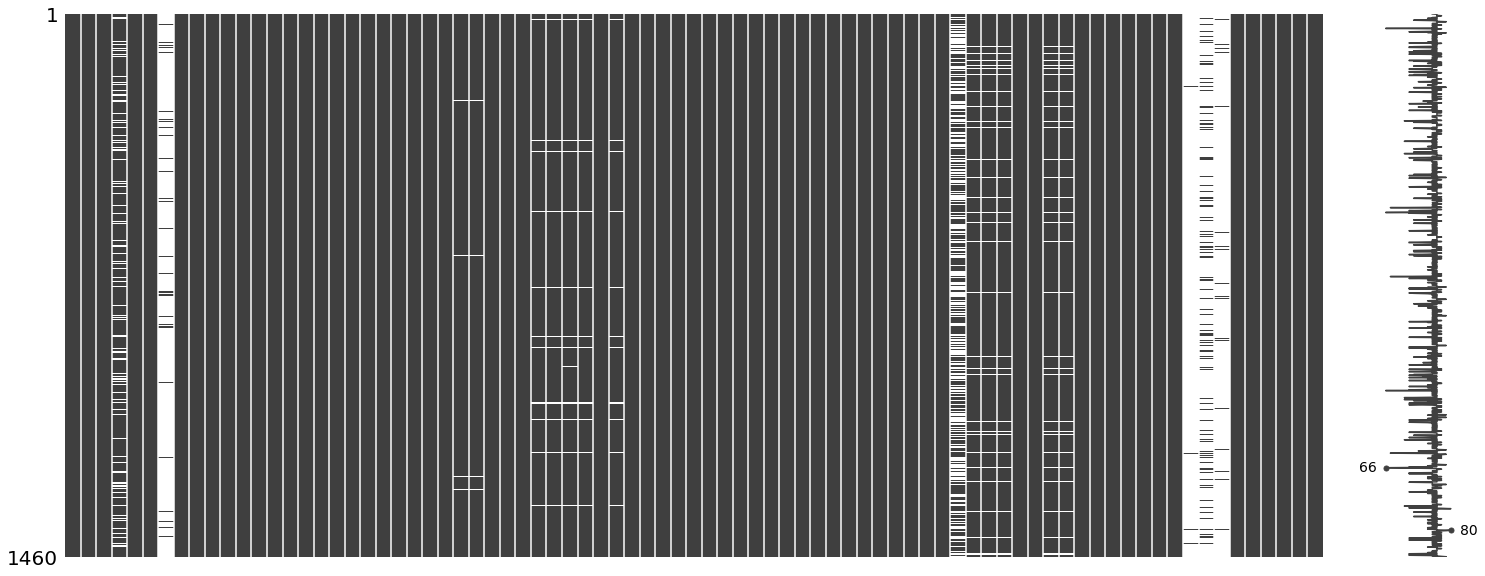

In [3]:
msno.matrix(house_prices_train)
nan_columns = pd.DataFrame({
    'Column:': house_prices_train.columns.values,
    'Amount of NaN values:': house_prices_train.isna().sum().values,
    'Percent of NaN values:': house_prices_train.isna().sum().values * 100 / len(house_prices_train), 
})
nan_columns = nan_columns[nan_columns['Amount of NaN values:'] > 0]
print(nan_columns.sort_values(by='Amount of NaN values:', ascending=False).reset_index(drop=True))


Replace NaN values in columns (in numerical: by mean value, in categorial: by mode value):

<AxesSubplot:>

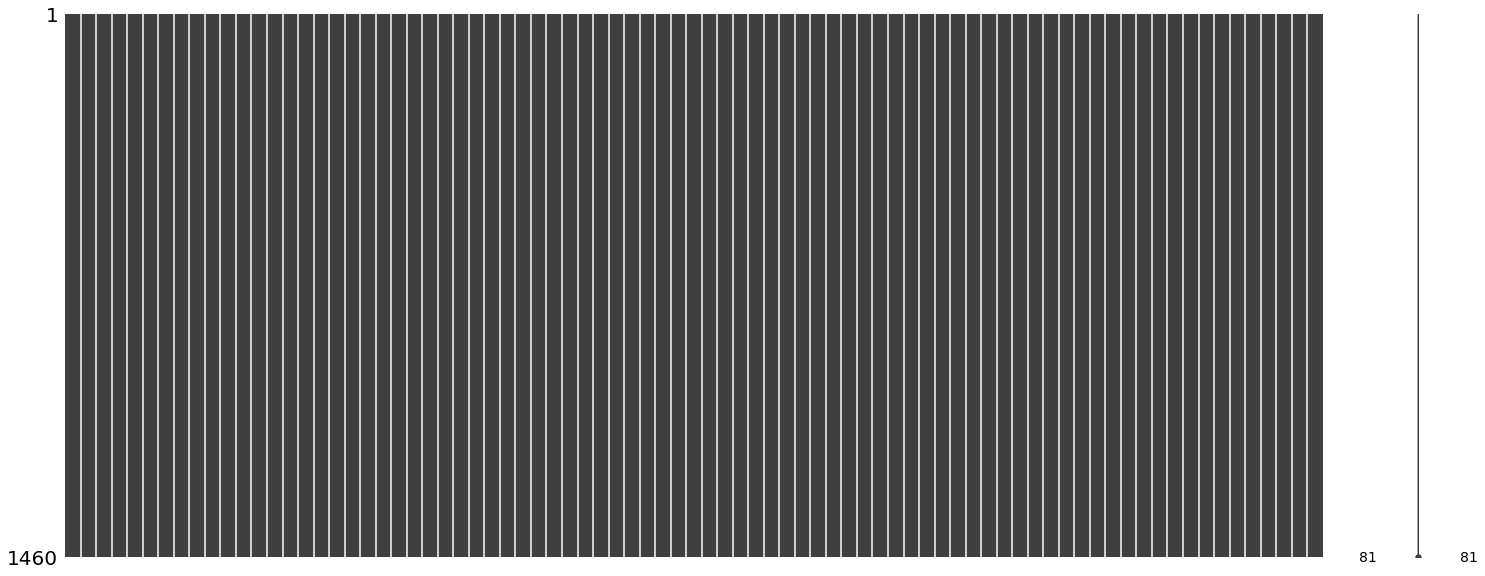

In [4]:
for column in nan_columns['Column:']:
    if house_prices_train[column].dtype == object:
        house_prices_train[column] = house_prices_train[column].fillna(house_prices_train[column].mode().to_numpy()[0])
    else:
        house_prices_train[column] = house_prices_train[column].fillna(house_prices_train[column].mean())

msno.matrix(house_prices_train)


Converting categorical values into numerical values:

In [5]:
for column in house_prices_train.columns:
    if house_prices_train[column].dtype == object:
        house_prices_train[column] = pd.factorize(house_prices_train[column].to_numpy())[0]


Separating training and testing data:

In [6]:
house_prices_input_test = house_prices_train.sample(frac=0.2, random_state=1)
house_prices_input_train = house_prices_train.drop(house_prices_input_test.index)

house_prices_output_train = house_prices_input_train.pop('SalePrice')
house_prices_output_test = house_prices_input_test.pop('SalePrice')


Data normalization:

In [7]:
for column in house_prices_input_train.columns:
    column_mean = house_prices_input_train[column].mean()
    column_std = house_prices_input_train[column].std()
    if abs(column_std - 0.0) <= 1e-5:
        column_std = 1
        
    house_prices_input_train[column] = house_prices_input_train[column] - column_mean
    house_prices_input_train[column] = house_prices_input_train[column] / column_std

    house_prices_input_test[column] = house_prices_input_test[column] - column_mean
    house_prices_input_test[column] = house_prices_input_test[column] / column_std


Creating model:

In [8]:
model = Sequential()

model.add(Dense(256, activation='relu', input_shape=(house_prices_input_train.shape[1],)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_logarithmic_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])


Training the model:

In [9]:
model.fit(house_prices_input_train, house_prices_output_train, epochs=1024, batch_size=16, verbose=1)


Epoch 1/1024
73/73 [==============================] - 0s 841us/step - loss: 122.6765 - root_mean_squared_error: 195093.5545
Epoch 2/1024
73/73 [==============================] - 0s 684us/step - loss: 96.2495 - root_mean_squared_error: 199977.2234
Epoch 3/1024
73/73 [==============================] - 0s 673us/step - loss: 85.1733 - root_mean_squared_error: 195982.1174
Epoch 4/1024
73/73 [==============================] - 0s 612us/step - loss: 77.3397 - root_mean_squared_error: 193505.7238
Epoch 5/1024
73/73 [==============================] - 0s 637us/step - loss: 71.5338 - root_mean_squared_error: 199735.9979
Epoch 6/1024
73/73 [==============================] - 0s 646us/step - loss: 66.6489 - root_mean_squared_error: 191508.5703
Epoch 7/1024
73/73 [==============================] - 0s 607us/step - loss: 63.5230 - root_mean_squared_error: 201282.0583
Epoch 8/1024
73/73 [==============================] - 0s 625us/step - loss: 59.8607 - root_mean_squared_error: 196738.8404
Epoch 9/1024
73

73/73 [==============================] - 0s 599us/step - loss: 17.5273 - root_mean_squared_error: 193344.9491
Epoch 68/1024
73/73 [==============================] - 0s 608us/step - loss: 17.3402 - root_mean_squared_error: 196652.2886
Epoch 69/1024
73/73 [==============================] - 0s 614us/step - loss: 17.0073 - root_mean_squared_error: 196942.1769
Epoch 70/1024
73/73 [==============================] - 0s 606us/step - loss: 16.8502 - root_mean_squared_error: 196319.0412
Epoch 71/1024
73/73 [==============================] - 0s 581us/step - loss: 16.5858 - root_mean_squared_error: 193224.8801
Epoch 72/1024
73/73 [==============================] - 0s 548us/step - loss: 16.3108 - root_mean_squared_error: 190912.2762
Epoch 73/1024
73/73 [==============================] - 0s 555us/step - loss: 16.0440 - root_mean_squared_error: 192905.0602
Epoch 74/1024
73/73 [==============================] - 0s 554us/step - loss: 15.9412 - root_mean_squared_error: 200466.2606
Epoch 75/1024
73/73 [=

73/73 [==============================] - 0s 660us/step - loss: 6.4318 - root_mean_squared_error: 180331.2633
Epoch 134/1024
73/73 [==============================] - 0s 695us/step - loss: 6.4397 - root_mean_squared_error: 184998.9508
Epoch 135/1024
73/73 [==============================] - 0s 660us/step - loss: 6.1171 - root_mean_squared_error: 183951.0838
Epoch 136/1024
73/73 [==============================] - 0s 667us/step - loss: 6.2263 - root_mean_squared_error: 185443.0942
Epoch 137/1024
73/73 [==============================] - 0s 689us/step - loss: 5.9483 - root_mean_squared_error: 182653.3788
Epoch 138/1024
73/73 [==============================] - 0s 688us/step - loss: 5.9466 - root_mean_squared_error: 183280.3186
Epoch 139/1024
73/73 [==============================] - 0s 644us/step - loss: 5.7533 - root_mean_squared_error: 181610.2154
Epoch 140/1024
73/73 [==============================] - 0s 625us/step - loss: 5.7980 - root_mean_squared_error: 179542.1404
Epoch 141/1024
73/73 [=

73/73 [==============================] - 0s 752us/step - loss: 2.0215 - root_mean_squared_error: 154749.5154
Epoch 200/1024
73/73 [==============================] - 0s 766us/step - loss: 1.9670 - root_mean_squared_error: 151376.5536
Epoch 201/1024
73/73 [==============================] - 0s 630us/step - loss: 1.8761 - root_mean_squared_error: 150294.4250
Epoch 202/1024
73/73 [==============================] - 0s 589us/step - loss: 1.9102 - root_mean_squared_error: 153581.9563
Epoch 203/1024
73/73 [==============================] - 0s 675us/step - loss: 1.8190 - root_mean_squared_error: 148426.6634
Epoch 204/1024
73/73 [==============================] - 0s 707us/step - loss: 1.8189 - root_mean_squared_error: 152944.3245
Epoch 205/1024
73/73 [==============================] - 0s 764us/step - loss: 1.7945 - root_mean_squared_error: 151458.2958
Epoch 206/1024
73/73 [==============================] - 0s 721us/step - loss: 1.7276 - root_mean_squared_error: 149776.0853
Epoch 207/1024
73/73 [=

73/73 [==============================] - 0s 539us/step - loss: 0.4889 - root_mean_squared_error: 107622.9698
Epoch 266/1024
73/73 [==============================] - 0s 535us/step - loss: 0.4883 - root_mean_squared_error: 104580.8414
Epoch 267/1024
73/73 [==============================] - 0s 542us/step - loss: 0.4914 - root_mean_squared_error: 105075.6954
Epoch 268/1024
73/73 [==============================] - 0s 546us/step - loss: 0.4431 - root_mean_squared_error: 100279.4127
Epoch 269/1024
73/73 [==============================] - 0s 528us/step - loss: 0.4562 - root_mean_squared_error: 102717.4125
Epoch 270/1024
73/73 [==============================] - 0s 569us/step - loss: 0.4423 - root_mean_squared_error: 97712.8407
Epoch 271/1024
73/73 [==============================] - 0s 567us/step - loss: 0.4264 - root_mean_squared_error: 99835.4474
Epoch 272/1024
73/73 [==============================] - 0s 596us/step - loss: 0.4347 - root_mean_squared_error: 102683.2870
Epoch 273/1024
73/73 [===

73/73 [==============================] - 0s 560us/step - loss: 0.1400 - root_mean_squared_error: 59043.6973
Epoch 332/1024
73/73 [==============================] - 0s 529us/step - loss: 0.1391 - root_mean_squared_error: 60910.4326
Epoch 333/1024
73/73 [==============================] - 0s 533us/step - loss: 0.1433 - root_mean_squared_error: 63983.0303
Epoch 334/1024
73/73 [==============================] - 0s 562us/step - loss: 0.1399 - root_mean_squared_error: 60398.5865
Epoch 335/1024
73/73 [==============================] - 0s 534us/step - loss: 0.1413 - root_mean_squared_error: 60482.2455
Epoch 336/1024
73/73 [==============================] - 0s 559us/step - loss: 0.1452 - root_mean_squared_error: 62642.7082
Epoch 337/1024
73/73 [==============================] - 0s 543us/step - loss: 0.1349 - root_mean_squared_error: 63141.0065
Epoch 338/1024
73/73 [==============================] - 0s 551us/step - loss: 0.1241 - root_mean_squared_error: 55065.6033
Epoch 339/1024
73/73 [=========

73/73 [==============================] - 0s 536us/step - loss: 0.0855 - root_mean_squared_error: 52246.6209
Epoch 398/1024
73/73 [==============================] - 0s 566us/step - loss: 0.0888 - root_mean_squared_error: 57579.2512
Epoch 399/1024
73/73 [==============================] - 0s 529us/step - loss: 0.0755 - root_mean_squared_error: 51741.3466
Epoch 400/1024
73/73 [==============================] - 0s 539us/step - loss: 0.0812 - root_mean_squared_error: 48818.7063
Epoch 401/1024
73/73 [==============================] - 0s 554us/step - loss: 0.0836 - root_mean_squared_error: 47428.9363
Epoch 402/1024
73/73 [==============================] - 0s 543us/step - loss: 0.0852 - root_mean_squared_error: 56933.1177
Epoch 403/1024
73/73 [==============================] - 0s 549us/step - loss: 0.0801 - root_mean_squared_error: 45981.8730
Epoch 404/1024
73/73 [==============================] - 0s 532us/step - loss: 0.0747 - root_mean_squared_error: 49828.1556
Epoch 405/1024
73/73 [=========

73/73 [==============================] - 0s 526us/step - loss: 0.0521 - root_mean_squared_error: 42886.5135
Epoch 464/1024
73/73 [==============================] - 0s 549us/step - loss: 0.0543 - root_mean_squared_error: 38152.8767
Epoch 465/1024
73/73 [==============================] - 0s 534us/step - loss: 0.0630 - root_mean_squared_error: 49644.2108
Epoch 466/1024
73/73 [==============================] - 0s 533us/step - loss: 0.0580 - root_mean_squared_error: 44046.1375
Epoch 467/1024
73/73 [==============================] - 0s 571us/step - loss: 0.0578 - root_mean_squared_error: 45123.9540
Epoch 468/1024
73/73 [==============================] - 0s 537us/step - loss: 0.0561 - root_mean_squared_error: 43085.7897
Epoch 469/1024
73/73 [==============================] - 0s 566us/step - loss: 0.0541 - root_mean_squared_error: 47579.3624
Epoch 470/1024
73/73 [==============================] - 0s 552us/step - loss: 0.0546 - root_mean_squared_error: 41568.3915
Epoch 471/1024
73/73 [=========

73/73 [==============================] - 0s 547us/step - loss: 0.0435 - root_mean_squared_error: 37685.8621
Epoch 530/1024
73/73 [==============================] - 0s 546us/step - loss: 0.0423 - root_mean_squared_error: 37164.8686
Epoch 531/1024
73/73 [==============================] - 0s 544us/step - loss: 0.0423 - root_mean_squared_error: 40374.4193
Epoch 532/1024
73/73 [==============================] - 0s 554us/step - loss: 0.0469 - root_mean_squared_error: 41812.6062
Epoch 533/1024
73/73 [==============================] - 0s 562us/step - loss: 0.0476 - root_mean_squared_error: 45903.2878
Epoch 534/1024
73/73 [==============================] - 0s 630us/step - loss: 0.0553 - root_mean_squared_error: 49669.9824
Epoch 535/1024
73/73 [==============================] - 0s 673us/step - loss: 0.0442 - root_mean_squared_error: 41684.5207
Epoch 536/1024
73/73 [==============================] - 0s 584us/step - loss: 0.0419 - root_mean_squared_error: 37054.6430
Epoch 537/1024
73/73 [=========

73/73 [==============================] - 0s 583us/step - loss: 0.0356 - root_mean_squared_error: 40583.7122
Epoch 596/1024
73/73 [==============================] - 0s 609us/step - loss: 0.0348 - root_mean_squared_error: 32779.8232
Epoch 597/1024
73/73 [==============================] - 0s 585us/step - loss: 0.0348 - root_mean_squared_error: 36512.0442
Epoch 598/1024
73/73 [==============================] - 0s 556us/step - loss: 0.0360 - root_mean_squared_error: 34411.1168
Epoch 599/1024
73/73 [==============================] - 0s 569us/step - loss: 0.0348 - root_mean_squared_error: 35293.5779
Epoch 600/1024
73/73 [==============================] - 0s 677us/step - loss: 0.0328 - root_mean_squared_error: 34621.7922
Epoch 601/1024
73/73 [==============================] - 0s 664us/step - loss: 0.0343 - root_mean_squared_error: 37880.2957
Epoch 602/1024
73/73 [==============================] - 0s 639us/step - loss: 0.0303 - root_mean_squared_error: 32951.0170
Epoch 603/1024
73/73 [=========

73/73 [==============================] - 0s 579us/step - loss: 0.0296 - root_mean_squared_error: 33754.3374
Epoch 662/1024
73/73 [==============================] - 0s 596us/step - loss: 0.0321 - root_mean_squared_error: 35882.9849
Epoch 663/1024
73/73 [==============================] - 0s 594us/step - loss: 0.0354 - root_mean_squared_error: 37480.8530
Epoch 664/1024
73/73 [==============================] - 0s 574us/step - loss: 0.0290 - root_mean_squared_error: 35773.8540
Epoch 665/1024
73/73 [==============================] - 0s 585us/step - loss: 0.0301 - root_mean_squared_error: 32345.7283
Epoch 666/1024
73/73 [==============================] - 0s 548us/step - loss: 0.0301 - root_mean_squared_error: 36595.0531
Epoch 667/1024
73/73 [==============================] - 0s 567us/step - loss: 0.0280 - root_mean_squared_error: 29889.4562
Epoch 668/1024
73/73 [==============================] - 0s 547us/step - loss: 0.0283 - root_mean_squared_error: 31039.3380
Epoch 669/1024
73/73 [=========

73/73 [==============================] - 0s 674us/step - loss: 0.0282 - root_mean_squared_error: 37309.3274
Epoch 728/1024
73/73 [==============================] - 0s 737us/step - loss: 0.0219 - root_mean_squared_error: 27107.2977
Epoch 729/1024
73/73 [==============================] - 0s 650us/step - loss: 0.0279 - root_mean_squared_error: 35582.8485
Epoch 730/1024
73/73 [==============================] - 0s 545us/step - loss: 0.0273 - root_mean_squared_error: 34508.7624
Epoch 731/1024
73/73 [==============================] - 0s 549us/step - loss: 0.0246 - root_mean_squared_error: 35441.5703
Epoch 732/1024
73/73 [==============================] - 0s 550us/step - loss: 0.0257 - root_mean_squared_error: 32350.5228
Epoch 733/1024
73/73 [==============================] - 0s 550us/step - loss: 0.0242 - root_mean_squared_error: 27901.2840
Epoch 734/1024
73/73 [==============================] - 0s 601us/step - loss: 0.0270 - root_mean_squared_error: 35977.4214
Epoch 735/1024
73/73 [=========

73/73 [==============================] - 0s 564us/step - loss: 0.0226 - root_mean_squared_error: 28318.0599
Epoch 794/1024
73/73 [==============================] - 0s 548us/step - loss: 0.0212 - root_mean_squared_error: 29377.7632
Epoch 795/1024
73/73 [==============================] - 0s 541us/step - loss: 0.0236 - root_mean_squared_error: 34125.5163
Epoch 796/1024
73/73 [==============================] - 0s 542us/step - loss: 0.0186 - root_mean_squared_error: 25779.6630
Epoch 797/1024
73/73 [==============================] - 0s 547us/step - loss: 0.0218 - root_mean_squared_error: 30473.6412
Epoch 798/1024
73/73 [==============================] - 0s 539us/step - loss: 0.0249 - root_mean_squared_error: 35110.6129
Epoch 799/1024
73/73 [==============================] - 0s 541us/step - loss: 0.0220 - root_mean_squared_error: 32589.4762
Epoch 800/1024
73/73 [==============================] - 0s 552us/step - loss: 0.0232 - root_mean_squared_error: 31182.2419
Epoch 801/1024
73/73 [=========

73/73 [==============================] - 0s 571us/step - loss: 0.0191 - root_mean_squared_error: 28363.1059
Epoch 860/1024
73/73 [==============================] - 0s 550us/step - loss: 0.0196 - root_mean_squared_error: 29873.4021
Epoch 861/1024
73/73 [==============================] - 0s 541us/step - loss: 0.0176 - root_mean_squared_error: 26034.9037
Epoch 862/1024
73/73 [==============================] - 0s 933us/step - loss: 0.0193 - root_mean_squared_error: 29801.6289
Epoch 863/1024
73/73 [==============================] - 0s 881us/step - loss: 0.0201 - root_mean_squared_error: 28501.6525
Epoch 864/1024
73/73 [==============================] - 0s 725us/step - loss: 0.0217 - root_mean_squared_error: 33025.7432
Epoch 865/1024
73/73 [==============================] - 0s 656us/step - loss: 0.0166 - root_mean_squared_error: 25212.6040
Epoch 866/1024
73/73 [==============================] - 0s 634us/step - loss: 0.0213 - root_mean_squared_error: 34776.8963
Epoch 867/1024
73/73 [=========

73/73 [==============================] - 0s 620us/step - loss: 0.0169 - root_mean_squared_error: 25785.8395
Epoch 926/1024
73/73 [==============================] - 0s 662us/step - loss: 0.0174 - root_mean_squared_error: 28155.8619
Epoch 927/1024
73/73 [==============================] - 0s 683us/step - loss: 0.0213 - root_mean_squared_error: 32412.0922
Epoch 928/1024
73/73 [==============================] - 0s 622us/step - loss: 0.0157 - root_mean_squared_error: 25965.1593
Epoch 929/1024
73/73 [==============================] - 0s 605us/step - loss: 0.0195 - root_mean_squared_error: 31067.6779
Epoch 930/1024
73/73 [==============================] - 0s 574us/step - loss: 0.0204 - root_mean_squared_error: 33479.5198
Epoch 931/1024
73/73 [==============================] - 0s 559us/step - loss: 0.0163 - root_mean_squared_error: 26633.7398
Epoch 932/1024
73/73 [==============================] - 0s 581us/step - loss: 0.0174 - root_mean_squared_error: 28874.7305
Epoch 933/1024
73/73 [=========

73/73 [==============================] - 0s 646us/step - loss: 0.0193 - root_mean_squared_error: 33184.4974
Epoch 992/1024
73/73 [==============================] - 0s 659us/step - loss: 0.0170 - root_mean_squared_error: 30011.9973
Epoch 993/1024
73/73 [==============================] - 0s 634us/step - loss: 0.0173 - root_mean_squared_error: 30783.8309
Epoch 994/1024
73/73 [==============================] - 0s 636us/step - loss: 0.0147 - root_mean_squared_error: 26852.3846
Epoch 995/1024
73/73 [==============================] - 0s 710us/step - loss: 0.0171 - root_mean_squared_error: 29385.2395
Epoch 996/1024
73/73 [==============================] - 0s 728us/step - loss: 0.0147 - root_mean_squared_error: 22943.9121
Epoch 997/1024
73/73 [==============================] - 0s 653us/step - loss: 0.0159 - root_mean_squared_error: 27824.7174
Epoch 998/1024
73/73 [==============================] - 0s 583us/step - loss: 0.0167 - root_mean_squared_error: 28425.3664
Epoch 999/1024
73/73 [=========

In [10]:
pred = model.predict(house_prices_input_test)
print(pred[72][0], ' ', house_prices_output_test.to_numpy()[72])


319896.4   354000


# Prediction with test data:

Loading sourse test data:

In [11]:
house_prices_test = pd.read_csv('./data/test.csv')


Prepare output dataframe:

In [12]:
house_prices_predicted_dataframe = pd.DataFrame()
house_prices_predicted_dataframe['Id'] = house_prices_test['Id']


Calculating percentage of missing values (NaN):

         Column:  Amount of NaN values:  Percent of NaN values:
0         PoolQC                   1456               99.794380
1    MiscFeature                   1408               96.504455
2          Alley                   1352               92.666210
3          Fence                   1169               80.123372
4    FireplaceQu                    730               50.034270
5    LotFrontage                    227               15.558602
6     GarageCond                     78                5.346127
7    GarageYrBlt                     78                5.346127
8     GarageQual                     78                5.346127
9   GarageFinish                     78                5.346127
10    GarageType                     76                5.209047
11      BsmtCond                     45                3.084304
12  BsmtExposure                     44                3.015764
13      BsmtQual                     44                3.015764
14  BsmtFinType1                     42 

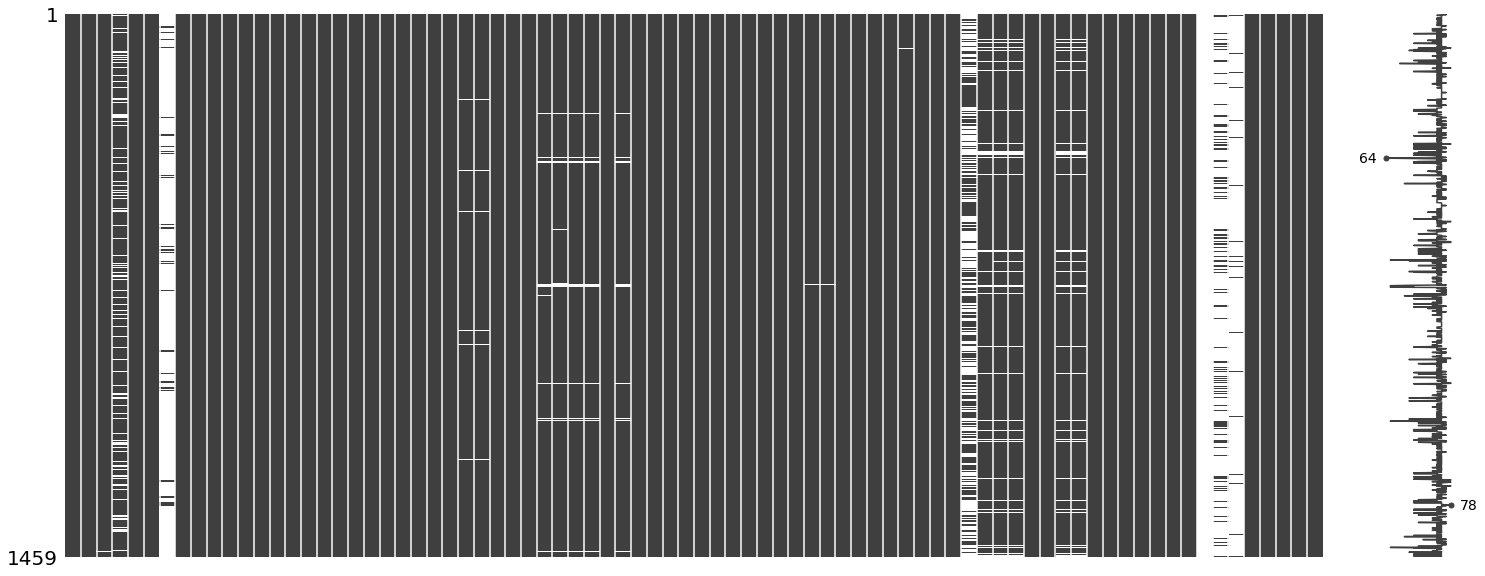

In [13]:
msno.matrix(house_prices_test)
nan_columns = pd.DataFrame({
    'Column:': house_prices_test.columns.values,
    'Amount of NaN values:': house_prices_test.isna().sum().values,
    'Percent of NaN values:': house_prices_test.isna().sum().values * 100 / len(house_prices_test), 
})
nan_columns = nan_columns[nan_columns['Amount of NaN values:'] > 0]
print(nan_columns.sort_values(by='Amount of NaN values:', ascending=False).reset_index(drop=True))


Replace NaN values in columns (in numerical: by mean value, in categorial: by mode value):

<AxesSubplot:>

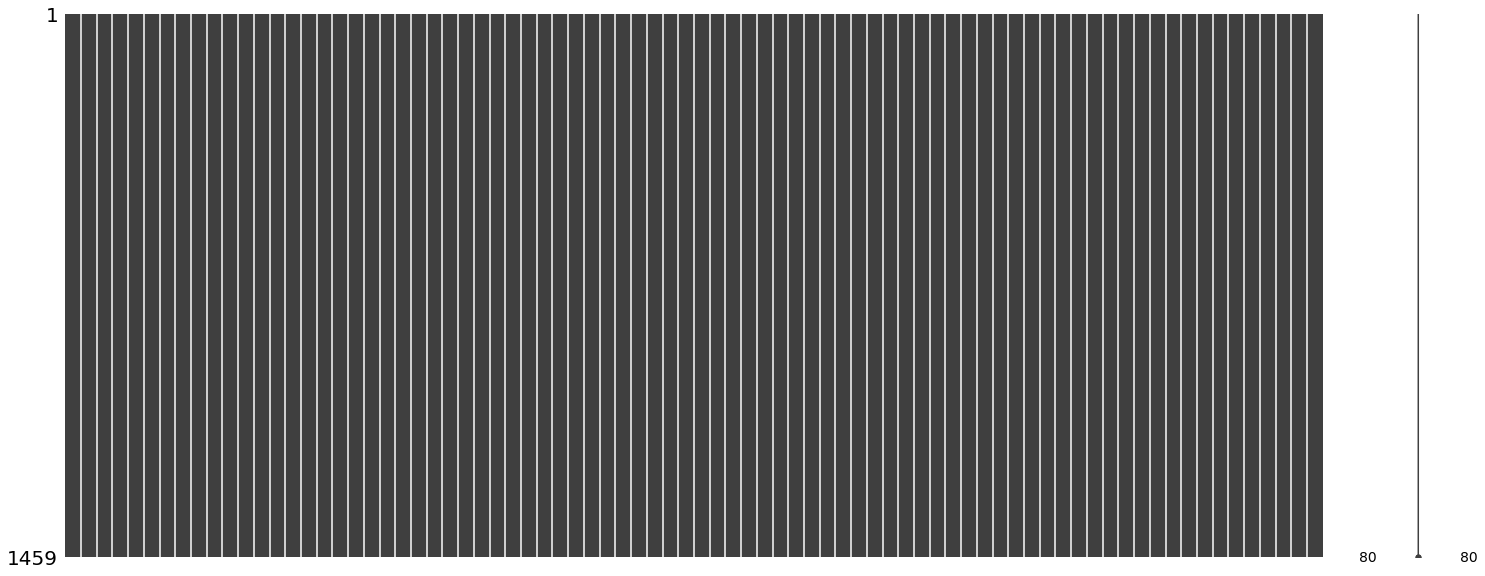

In [14]:
for column in nan_columns['Column:']:
    if house_prices_test[column].dtype == object:
        house_prices_test[column] = house_prices_test[column].fillna(house_prices_test[column].mode().to_numpy()[0])
    else:
        house_prices_test[column] = house_prices_test[column].fillna(house_prices_test[column].mean())

msno.matrix(house_prices_test)



Converting categorical values into numericalvalues:

In [15]:
for column in house_prices_test.columns:
    if house_prices_test[column].dtype == object:
        house_prices_test[column] = pd.factorize(house_prices_test[column].to_numpy())[0]


Data normalization:

In [16]:
for column in house_prices_test.columns:
    column_mean = house_prices_test[column].mean()
    column_std = house_prices_test[column].std()
    if abs(column_std - 0.0) <= 1e-5:
        column_std = 1
        
    house_prices_test[column] = house_prices_test[column] - column_mean
    house_prices_test[column] = house_prices_test[column] / column_std



Prediction:

In [17]:
house_prices_predicted = model.predict(house_prices_test)
house_prices_predicted = house_prices_predicted.reshape(-1)


Saving predicted values to csv:

In [18]:
house_prices_predicted_dataframe['SalePrice'] = pd.Series(house_prices_predicted)
house_prices_predicted_dataframe.to_csv('./output/predicted_prices.csv')
